# Stable Diffusion 🎨

Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/). It's trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M UNet and 123M text encoder, the model is relatively lightweight and runs on a GPU with at least 10GB VRAM.

## Getting Started

**This notebook requires an NVIDIA GPU.** Get started by install this notebook's requirements and downloading the pre-trained stable diffusion model from Hugging Face.

In [4]:
!nvidia-smi -L && echo 'GPU detected!' || echo 'ERROR: No GPU detected. This notebook requires an NVIDIA GPU.'

/bin/bash: nvidia-smi: command not found
ERROR: No GPU detected. This notebook requires an NVIDIA GPU.


In [2]:
%pip install --quiet diffusers==0.2.4 transformers scipy ftfy "ipywidgets>=7,<8" huggingface_hub

Note: you may need to restart the kernel to use updated packages.


### Hugging Face

Follow these steps to download the pre-trained stable diffusion model from Hugging Face:

1. [Create a Hugging Face account](https://huggingface.co/join) if you don't have one already
2. Visit https://huggingface.co/CompVis/stable-diffusion-v1-4 and agree to Hugging Face's conditions to access the model
3. Sign in to your Hugging Face account and [generate a token](https://huggingface.co/docs/hub/security-tokens#user-access-tokens)
4. Run the next cell to sign into Hugging Face with your token

You can also [create and set a `HUGGING_FACE_TOKEN` secret](https://docs.github.com/en/codespaces/managing-your-codespaces/managing-encrypted-secrets-for-your-codespaces) within your individual account settings for Codespaces.

If you're having trouble pasting your token, try these steps:
1. Click on the token text field
2. Use shift+tab to change focus to "your Hugging Face tokens page"
3. Without changing focus, ctrl/cmd+V to paste your token
4. Click "Login"

In [3]:
from huggingface_hub import HfFolder, notebook_login
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
if token != None:
    HfFolder.save_token(token)
else:
    notebook_login()

## Build the Generator

You're all set to build an image generator! Run the next cells to download the model and copy it to your GPU.

In [46]:
Íimport torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=True)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [48]:
device="cuda"
pipe = pipe.to(device)

## Create New Art

Update `prompt` and run the following cells to create original art. You can run these cells as many times as you'd like. Each run generates an original image!

In [50]:
prompt = "a photograph of an astronaut riding a horse"

0it [00:00, ?it/s]

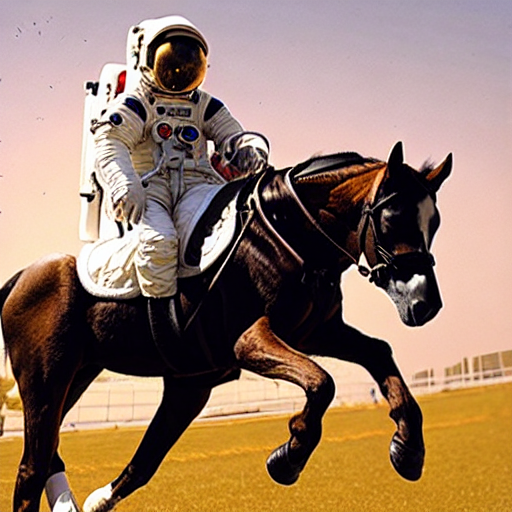

In [56]:
from torch import autocast

with autocast(device):
  image = pipe(prompt)["sample"][0]
image

Run that cell as many times as you'd like! Each run will generate a brand-new piece of art.